Exercise Sheet 7 **Decision Making II**

__Adu Matory__ and __Lukas Braun__, November 29

In [0]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise 1: Chapman-Kolmogorov**

In [0]:
# 1.1 

dx = 1
dt = 1
M = int(1000/dt)
N = 2 * 50 + 1 # positions
e = .000001 # epsilon, for log-scaling

sigma = 1.0
mu = 0.1

NMmat = np.zeros(np.array([N,M]).astype(int))
NMmat[50,0] = 1 # setting initial conidition, particle in center bin

In [0]:
# 1.2

def tpx(x,xa,t,sig=sigma,mu=mu):
  """ Probability of transitioning to any x from any x'"""
  return 1/np.sqrt(np.pi*2*dt*sig**2) * np.exp(-((x-xa-mu*dt)**2)/(2*dt*sigma**2))

# # alternative calculation
# NNmat = np.zeros((N,N))
# for i, x in enumerate(np.arange(N)): # x
#   for j, y in enumerate(np.arange(N)): # x'
#     NNmat[i,j] = tpx(i,j,dt) # x by x' matrix

x = np.arange(N)
mx = np.tile(x,(N,1)) # matrix
NNmat = tpx(mx,mx.T,dt)

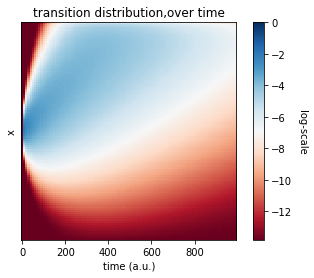

In [0]:
#1.3

# calculating for each time step
for i in range(int(M)-1):
  NMmat[:,i+1] = NNmat @ NMmat[:,i]

sNMmat = np.log(NMmat+e) # scaling

# Plotting every M/100 time steps
idx = np.linspace(0,M,100,endpoint=False).astype(int)

fig, ax = plt.subplots()
p = ax.imshow(sNMmat[:,idx], cmap='RdBu', interpolation='none')
ax.set_ylabel('x')
ax.set_xlabel('time (a.u.)')

ax.set_xticklabels(idx[::20])
ax.set_xticks(np.arange(0,100,20))
ax.set_yticks([])


ax.set_title('transition distribution,over time')

# setting color bar 
cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('log-scale', rotation=270)


plt.show()

1.4 

We've implemented a 'box' boundary condition -- we can see x as a particle in a box, bouncing off the upper lid. The boundary condition does not make sense with what we want to simulate. Over multiple trials, we would like to see the simulation 'reset' and the x come back to its initial position so that the process of evidence accumulation can restart. 

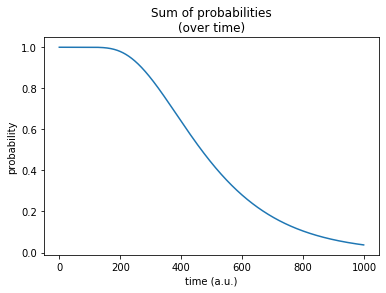

In [0]:
#1.5
plt.plot(np.sum(NMmat,axis=0))
plt.title("Sum of probabilities\n(over time)")
plt.xlabel('time (a.u.)')
plt.ylabel('probability')
plt.show()

1.5 
As time passes, there is a decrease in the probability of x being in many states/positions at a given time, until we reach the stationary distribution. It is not normalized because of the boundary condition.

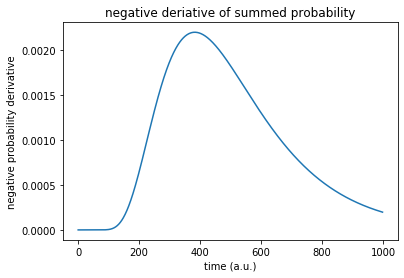

In [0]:
# 1.6 

plt.plot(-np.diff(np.sum(NMmat,axis=0)))
plt.xlabel('time (a.u.)')
plt.ylabel('negative probability derivative')
plt.title('negative deriative of summed probability')
plt.show()

1.6

This is a gamma distribution, the same distribution obtained in Decision Making I Ex 1.4.

1.7

It would be challenging to determine the probability of making each of two decisions over time -- x strongly accumulates toward an upper bound. We might decrease our mu to increase the probability of reaching a lower or upper bound. We might also initialized our x at a value lower than our center bin.

**Exercise 2: Fokker-Planck**

In [0]:
#2.1

fNMmat = np.zeros(np.array([N,M]).astype(int))
fNMmat[50,0] = 1 # setting initial conidition, particle in center bin

In [0]:
#2.2 

r = dt/dx**2

def FPdiscrete(x,r):
    """ Probability of transitioning to x at next time step.
    Takes array of x values"""
    tp = []

    for i, val in enumerate(x):
      ans =  (1-r*sigma**2)*val 
      if i > 0:
        ans += .5*(r*mu/dx + r*sigma**2)*x[i-1]
      if i < len(x) - 1:
        ans += 5*(-r*mu/dx + r*sigma**2)*x[i+1]
      
      tp.append(ans)

    return np.array(tp)

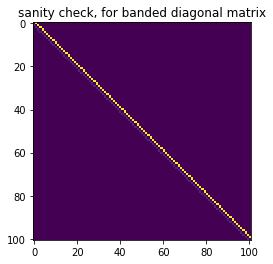

In [0]:
# calculating transition probability for each row of NxN matrix

# test = FPdiscrete(NMmat[:,0])
fNN = np.zeros((N,N))
np.fill_diagonal(fNN, 1) # assuming P(x,t) == 1 for each P(x,t+dt) and P(x+1,t) = P(x-1,t) = 0 
fNN = FPdiscrete(fNN,r)

plt.imshow(fNN) # sanity check
plt.title('sanity check, for banded diagonal matrix')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in matmul
  


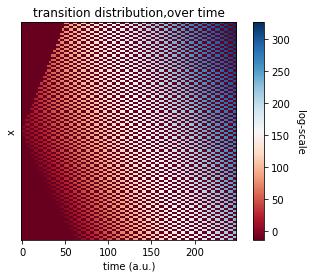

In [0]:
#2.3

# calculating for each time step
for i in range(int(M)-1):
  fNMmat[:,i+1] = fNN @ fNMmat[:,i]

sfNMmat = np.log(fNMmat+e) # scaling


# Plotting every 100 time steps, and only 1/4 of total simulation time
# we encounter a divide by zero error if simulation runs too long
idx = np.linspace(0,M/4,100,endpoint=False).astype(int)

fig, ax = plt.subplots()
p = ax.imshow(sfNMmat[:,idx], cmap='RdBu', interpolation='none')
ax.set_ylabel('x')
ax.set_xlabel('time (a.u.)')

ax.set_xticklabels(idx[::20])
ax.set_xticks(np.arange(0,100,20))
ax.set_yticks([])

ax.set_title('transition distribution,over time')

# setting color bar 
cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('log-scale', rotation=270)
plt.show()

2.3 

The system behaves erratically -- it seems to favor alternating states, which switch every few time points, creating a checkerboard transition distribution. Not what I expected. Mind is a little blown.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


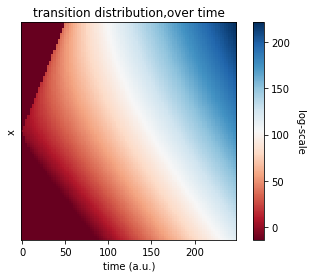

In [0]:
# 2.4

#changin parameters
dt = .5
r = dt/dx**2

# allocating NxM matrix
fNMmat = np.zeros(np.array([N,M]).astype(int))
fNMmat[50,0] = 1 # setting initial conidition, particle in center bin

#calculating transition probabilities
fNN24 = np.zeros((N,N))
np.fill_diagonal(fNN24, 1)
fNN24 = FPdiscrete(fNN24,r)

# calculating p(x) for each timestep
for i in range(int(M)-1):
  fNMmat[:,i+1] = fNN24 @ fNMmat[:,i]

sfNMmat = np.log(fNMmat+e) # scaling

# Plotting every 100 time steps, and only 1/4 of total simulation time
# we encounter a divide by zero error if simulation runs too long
idx = np.linspace(0,M/4,100,endpoint=False).astype(int)

fig, ax = plt.subplots()
p = ax.imshow(sfNMmat[:,idx], cmap='RdBu', interpolation='none')
ax.set_ylabel('x')
ax.set_xlabel('time (a.u.)')

ax.set_xticklabels(idx[::20])
ax.set_xticks(np.arange(0,100,20))
ax.set_yticks([])

ax.set_title('transition distribution,over time')

# setting color bar 
cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('log-scale', rotation=270)
plt.show()


2.4

Does it improve? You bet it does. Accumulation is much faster and the probability 'band' is narrower. This is due to the lower amount of noise (dependent on the size of dt)

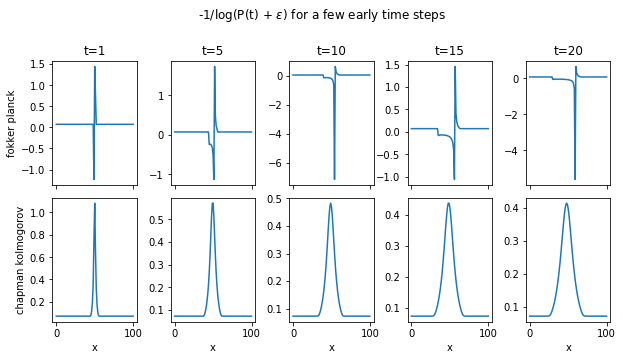

In [0]:
#2.5 
num = 5 # number of timesteps
t = np.linspace(1,20,num).astype(int)

fig, axs = plt.subplots(2,num,figsize=(10,5),sharex=True)
axs.ravel()
axs = axs.flatten()

fig.suptitle('-1/log(P(t) + $\epsilon$) for a few early time steps',y=1)
fig.subplots_adjust(wspace =.4, hspace=.1, top=.85)

# plotting both chapman kolmogorov and fokker planck equations
for i,x in enumerate(t):
  axs[i].plot(np.arange(N), -1/np.log(fNMmat[:,x] + e))
  axs[i].set_title(f't={x}')

  axs[i+5].plot(np.arange(N), -1/np.log(NMmat[:,x] + e))
  axs[i+5].set_xlabel('x')


axs[5].set_ylabel('chapman kolmogorov')
axs[0].set_ylabel('fokker planck')

plt.show()

2.5

The Fokker-Planck and Chapman-Kolmogorov solutions are different because of the differences in sparsity of the transformation matrices

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in matmul


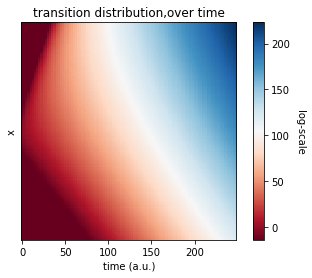

In [0]:
#2.6 

#setting parameters
dt = .5
r = dt/dx**2
sigma2 = 2
mu2 = 50

# definig gaussian pdf
def gausspdf(x):
    return 1/np.sqrt(2*np.pi*sigma2) * np.exp(-(x-mu2)**2/(2*sigma2**2))

# allocating NxM matrix and setting intial condition
fNMmat = np.zeros(np.array([N,M]).astype(int))
fNMmat[:,0] = gausspdf(np.arange(N))

# calculating our fokker planck transition matrix
fNN26 = np.zeros((N,N))
np.fill_diagonal(fNN26, 1)
fNN26 = FPdiscrete(fNN26,r)

# calculating probability distribution, scaled
for i in range(int(M)-1):
  fNMmat[:,i+1] = fNN26 @ fNMmat[:,i]

# fsf = np.tile(np.max(fNMmat,axis=0),(N,1))
# sfNMmat = fNMmat/fsf
sfNMmat = np.log(fNMmat+e) # scaling


# Plotting every 100 time steps, and only 1/4 of total simulation time
# we encounter a divide by zero error if simulation runs too long
idx = np.linspace(0,M/4,100,endpoint=False).astype(int)

fig, ax = plt.subplots()
p = ax.imshow(sfNMmat[:,idx], cmap='RdBu', interpolation='none')
ax.set_ylabel('x')
ax.set_xlabel('time (a.u.)')

ax.set_xticklabels(idx[::20])
ax.set_xticks(np.arange(0,100,20))
ax.set_yticks([])

ax.set_title('transition distribution,over time')

# setting color bar 
cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('log-scale', rotation=270)
plt.show()


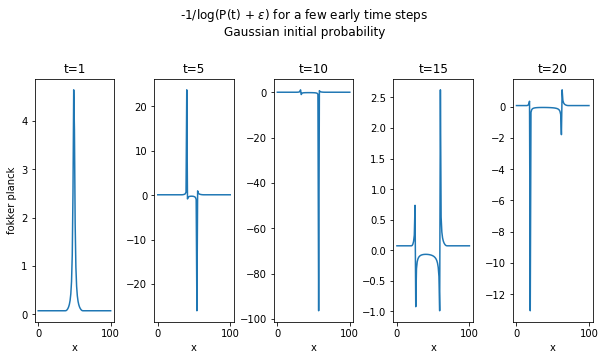

In [0]:
#2.7

fig, axs = plt.subplots(1,num,figsize=(10,5),sharex=True)
axs.ravel()
axs = axs.flatten()

fig.suptitle('-1/log(P(t) + $\epsilon$) for a few early time steps \nGaussian initial probability',y=1)
fig.subplots_adjust(wspace =.5, top=.8)

# plotting fokker planck
for i,x in enumerate(t):
  axs[i].plot(np.arange(N), -1/np.log(fNMmat[:,x] + e))
  axs[i].set_title(f't={x}')
  axs[i].set_xlabel('x')

axs[0].set_ylabel('fokker planck')

plt.show()

2.8

The initial condition has this effect on the computed distributions due to the ?Fokker Planck equation being derived from a Markov chain -- the intiial conditions heavily influence the stationary distribution